In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PythonApplication1 import *

[-0.06458681 -0.05503128 -0.74333098]


<Figure size 640x480 with 1 Axes>

# Laden der Daten

In [3]:
truth = readData("truth")
data = readData("data")

measurements = data.filter(regex='^z')
controlIn = data.filter(regex='^u')

z = measurements.to_numpy()
u = controlIn.to_numpy()

xgt = truth.to_numpy()

# Darstellung Messdaten und ControllInput

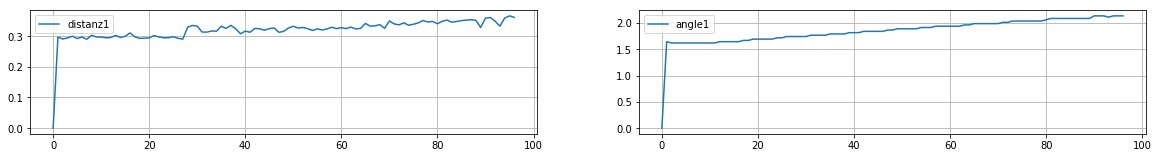

In [4]:
#z = [linkeOdometrie, rechteOdometrie, distanzInCm, angleInRadians]
plt.figure(figsize=(20, 5))
ax = plt.subplot(221)
ax.plot(z[:, 0], label='distanz1')
# ax.plot(z[:, 2], label='distanz2')
ax.legend()
ax.grid()

ax = plt.subplot(222)
ax.plot(z[:, 1], label='angle1')
# ax.plot(z[:, 3], label='angle2')
ax.legend()
ax.grid()




# Darstellung Prediction, ControllInput und GT

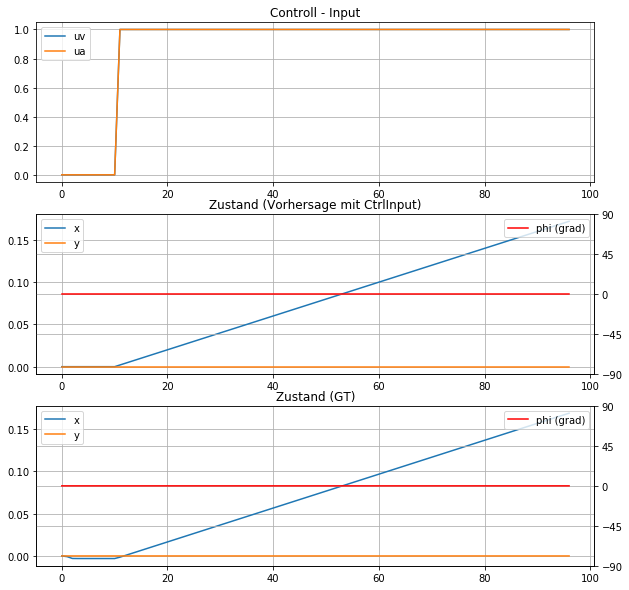

In [5]:
N = u.shape[0]
x = np.array([0., 0., 0.])
dt = .1
xvec = []
for k in range(N):
    uk = u[k,:]
    zk = z[k,:]
    
    x = state_trans(x, dt, uk)
    xvec.append(x)
    
xvec = np.array(xvec)

plt.figure(figsize=(10, 10))
ax = plt.subplot(312)
ax.plot(xvec[:,0], label='x')
ax.plot(xvec[:,1], label='y')
ax.legend()
ax.grid()

ax = ax.twinx()
ax.plot(xvec[:,2]*180/np.pi, label='phi (grad)', color='r')
ax.legend()
ax.set_title('Zustand (Vorhersage mit CtrlInput)')
ax.set_yticks(np.arange(-2,3)*45)
ax.grid()

ax = plt.subplot(311)
ax.plot(u[:,0], label='uv')
ax.plot(u[:,1], label='ua')
ax.set_title('Controll - Input')
ax.legend()
ax.grid()

ax = plt.subplot(313)
ax.plot(xgt[:,0], label='x')
ax.plot(xgt[:,1], label='y')
ax.legend()
ax.grid()

ax = ax.twinx()
ax.plot(xgt[:,2]*180/np.pi, label='phi (grad)', color='r')
ax.legend()
ax.set_title('Zustand (GT)')
ax.set_yticks(np.arange(-2,3)*45)
ax.grid()



# Darstellung der Messdaten

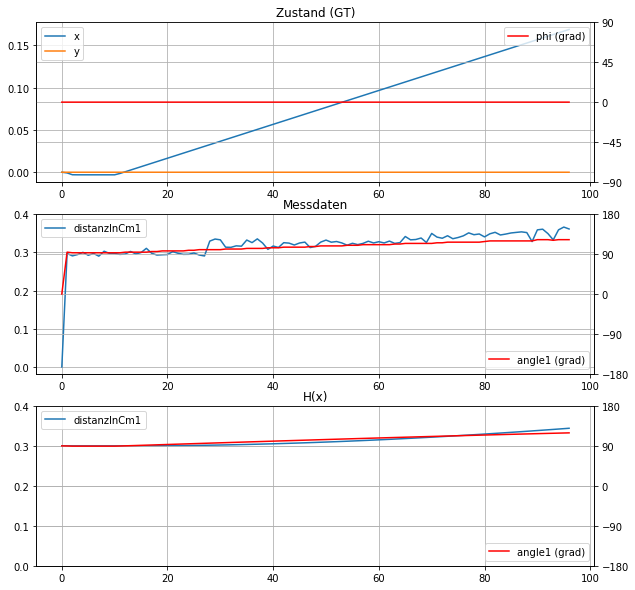

In [6]:
plt.figure(figsize=(10, 10))

N = u.shape[0]
x = np.array([0., 0, 0, 0, 0])
dt = .1
zhatvec = []

beacons = np.array([[0., 0.3]])

for k in range(N):
    uk = u[k,:]
    zk = z[k,:]
    xgtk = np.array([xgt[k,0], xgt[k,1], xgt[k,2]])
    zhat = measurement_trans(xgtk, beacons)
    zhatvec.append(zhat)
    
zhatvec = np.array(zhatvec)



ax = plt.subplot(311)
ax.plot(xgt[:,0], label='x')
ax.plot(xgt[:,1], label='y')
ax.legend()
ax.grid()

ax = ax.twinx()
ax.plot(xgt[:,2]*180/np.pi, label='phi (grad)', color='r')
ax.legend()
ax.set_title('Zustand (GT)')
ax.set_yticks(np.arange(-2,3)*45)
ax.grid()


ax = plt.subplot(312)
ax.plot(z[:, 0], label='distanzInCm1')
# ax.plot(z[:, 2], label='distanzInCm2')
ax.set_yticks(np.arange(0, 5) * 0.1)
ax.legend(loc='upper left')
ax.grid()

ax = ax.twinx()
ax.plot(z[:, 1]*180/np.pi, label='angle1 (grad)', color='r')
# ax.plot(z[:, 3]*180/np.pi, label='angle2 (grad)', color='m')
ax.legend(loc='lower right')
ax.set_yticks(np.arange(-2,3)*90)
ax.set_title('Messdaten')
ax.grid()

ax = plt.subplot(313)
ax.plot(zhatvec[:, 0], label='distanzInCm1')
# ax.plot(zhatvec[:, 2], label='distanzInCm2')
ax.set_yticks(np.arange(0, 5) * 0.1)
ax.legend(loc='upper left')
ax.grid()

ax = ax.twinx()
ax.plot(zhatvec[:, 1]*180/np.pi, label='angle1 (grad)', color='r')
# ax.plot(zhatvec[:, 3]*180/np.pi, label='angle2 (grad)', color='m')
ax.legend(loc='lower right')
ax.set_yticks(np.arange(-2,3)*90)
ax.set_title('H(x)')
ax.grid()



In [7]:
zhatvec[:, 0]

array([0.3       , 0.29999908, 0.30001098, 0.30001131, 0.30001134,
       0.30001134, 0.30001134, 0.30001134, 0.30001134, 0.30001134,
       0.30001134, 0.2999993 , 0.29999627, 0.30000663, 0.30003034,
       0.30006741, 0.30011783, 0.30018159, 0.30025867, 0.30034908,
       0.30045279, 0.30056979, 0.30070006, 0.30084358, 0.30100033,
       0.30117029, 0.30135343, 0.30154972, 0.30175913, 0.30198164,
       0.30221721, 0.30246581, 0.30272741, 0.30300196, 0.30328943,
       0.30358978, 0.30390296, 0.30422895, 0.30456769, 0.30491914,
       0.30528325, 0.30565998, 0.30604929, 0.30645111, 0.30686541,
       0.30729213, 0.30773123, 0.30818264, 0.30864633, 0.30912222,
       0.30961028, 0.31011044, 0.31062265, 0.31114685, 0.31168298,
       0.31223099, 0.31279081, 0.31336239, 0.31394566, 0.31454056,
       0.31514704, 0.31576502, 0.31639444, 0.31703524, 0.31768735,
       0.31835071, 0.31902524, 0.31971088, 0.32040756, 0.32111521,
       0.32183375, 0.32256313, 0.32330325, 0.32405406, 0.32481